In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pickle
%matplotlib widget

In [9]:
flat_list = np.genfromtxt('../group08_HAT-P-12_20230214/flat/flat_list.txt', dtype=str)
print(flat_list)

['AF824326.fits' 'AF824327.fits' 'AF824328.fits' 'AF824329.fits'
 'AF824330.fits' 'AF824331.fits' 'AF824332.fits' 'AF824333.fits'
 'AF824334.fits' 'AF824335.fits' 'AF824336.fits' 'AF824337.fits'
 'AF824338.fits' 'AF824339.fits' 'AF824340.fits' 'AF824341.fits'
 'AF824342.fits' 'AF824343.fits' 'AF824344.fits' 'AF824345.fits'
 'AF824346.fits' 'AF824347.fits' 'AF824348.fits' 'AF824349.fits'
 'AF824350.fits' 'AF824351.fits' 'AF824352.fits' 'AF824353.fits'
 'AF824354.fits' 'AF824355.fits']


In [10]:
n_flat = len(flat_list)

In [11]:
median_bias = pickle.load(open('../Results/median_bias.p', 'rb'))
median_bias_error = pickle.load(open('../Results/median_bias_error.p', 'rb'))

#we'll need:
#RON
#gain

In [13]:
flat00_fits = fits.open('../group08_HAT-P-12_20230214/flat/' + flat_list[0])
flat00_fits[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  521 / length of data axis 1                          
NAXIS2  =                  156 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2023-02-15T05:19:11' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
FILENAME= 'AF824326.fits'      / Original file name                             
TIMESYS = 'UTC     '        

In [15]:
flat00_gain = flat00_fits[0].header['GAIN']
flat00_ron = flat00_fits[0].header['RDNOISE']
flat00_data = flat00_fits[0].data * flat00_gain

In [18]:
print('Gain =', f'{flat00_gain:.2f}')
print(flat00_ron)
print(flat00_data)

Gain = 1.91
7.1
[[3077.01 3021.62 3050.27 ... 2828.71 2807.7  2807.7 ]
 [2786.69 2771.41 2784.78 ... 2817.25 2805.79 2800.06]
 [2792.42 2782.87 2779.05 ... 2811.52 2815.34 2809.61]
 ...
 [2767.59 2773.32 2780.96 ... 2813.43 2805.79 2805.79]
 [2773.32 2777.14 2763.77 ... 2819.16 2794.33 2796.24]
 [2777.14 2750.4  2771.41 ... 2819.16 2788.6  2800.06]]


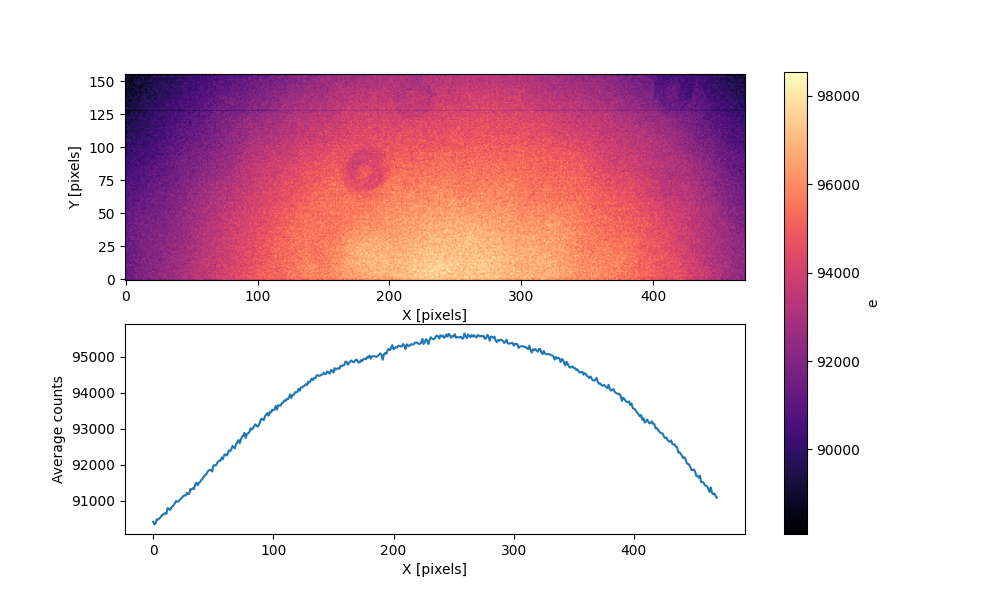

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
im1 = ax[0].imshow(flat00_data[:, 20:490], origin='lower', cmap='magma')   #the indexing is to exclude the black columns in the CCD
median_column = np.average(flat00_data[:, 20:490], axis=0)
im2 = ax[1].plot(median_column)
cbar = fig.colorbar(im1, ax=ax)

cbar.set_label('e')
ax[0].set_xlabel('X [pixels]')
ax[0].set_ylabel('Y [pixels]')
ax[1].set_xlabel('X [pixels]')
ax[1].set_ylabel('Average counts')
plt.show()